In [20]:

"""

How to read a COCO JSON file to understand the structure of the data?

"""

import json

# Load the JSON file
with open(r'D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test\_annotations.coco.json') as file:
    data = json.load(file)

# Print out the first few image filenames/paths
for img in data['images'][:10]:  # Adjust the number to print more or fewer paths
    print(img['file_name'])

car-bumped-front-has-dents-mud-attached-to-wheel-driving-rainy-season-vehicles-must-be-cared-terms-146223915_jpg.rf.00717a490d6bdb617b6b81a9537ba9a7.jpg
scratch-car-color-damaged-due-to-accident-white-158343474_jpg.rf.0626ff2ad8de2f683b6e696ed235839b.jpg
car-dent-left-side-35404389_jpg.rf.07b8dd2ccbe0e1d6d0a1256ddaccc74b.jpg
car-accident-4991518_jpg.rf.091d3e55eabfff97db47712ddce9a10e.jpg
dents-on-cars-3_jpeg_jpg.rf.0c37c48d02c69f405e7da15e5105619f.jpg
close-up-new-scratch-damage-front-new-red-car-close-up-new-scratch-damage-front-new-red-car-162722837_jpg.rf.082f6081a5379ba088235d036e9d66f3.jpg
closeup-red-car-paint-damage-long-scratch-shallow-focus-closeup-red-car-paint-damage-long-scratch-199856074_jpg.rf.110c7d514a54b42d8fcd72a4e3003806.jpg
damaged-car-scratches-dent-door-dints-auto-road-accident-crashed-automobile-side-part-parked-223385365_jpg.rf.11a8c9524906abac438aff7e21457b0f.jpg
minor-dent-car-rear-door-due-to-accident-vehicle-93222797_jpg.rf.29ce97f396d6a363327381a9ce22648b.

In [21]:
################################

#Understanding the structure of JSON:


import json

def print_structure(d, indent=0):
    """Print the structure of a dictionary or list."""

    # If the input is a dictionary
    if isinstance(d, dict):
        for key, value in d.items():
            print('  ' * indent + str(key))
            print_structure(value, indent+1)

    # If the input is a list
    elif isinstance(d, list):
        print('  ' * indent + "[List of length {} containing:]".format(len(d)))
        if d:
            print_structure(d[0], indent+1)  # Only print the structure of the first item for brevity

# Load the JSON file
with open(r'D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test\_annotations.coco.json') as file:
    data = json.load(file)

print_structure(data)

info
  year
  version
  description
  contributor
  url
  date_created
licenses
  [List of length 1 containing:]
    id
    url
    name
categories
  [List of length 3 containing:]
    id
    name
    supercategory
images
  [List of length 98 containing:]
    id
    license
    file_name
    height
    width
    date_captured
    extra
      user_tags
        [List of length 1 containing:]
annotations
  [List of length 408 containing:]
    id
    image_id
    category_id
    bbox
      [List of length 4 containing:]
    area
    segmentation
      [List of length 1 containing:]
        [List of length 26 containing:]
    iscrowd


C:\Users\MUJ\AppData\Local\Temp\ipykernel_82928\2906775102.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


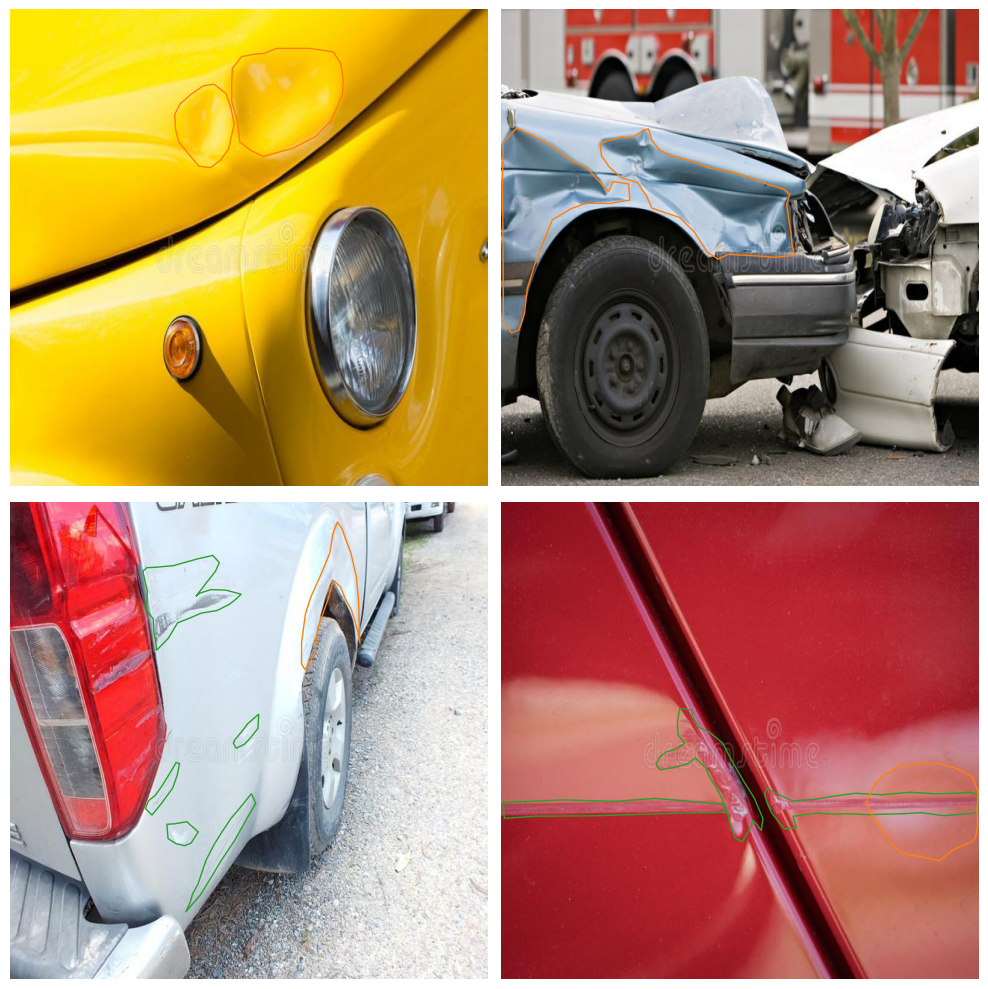

In [22]:


"""
How to visualize COCO annotations on images?

"""


import os
import random
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def display_images_with_coco_annotations(image_paths, annotations, display_type='both', colors=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for ax, img_path in zip(axs.ravel(), image_paths):
        # Load image using OpenCV and convert it from BGR to RGB color space
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax.imshow(image)
        ax.axis('off')  # Turn off the axes

        # Define a default color map if none is provided
        if colors is None:
            colors = plt.cm.get_cmap('tab10')

        # Get image filename to match with annotations
        img_filename = os.path.basename(img_path)
        img_id = next(item for item in annotations['images'] if item["file_name"] == img_filename)['id']

        # Filter annotations for the current image
        img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]

        for ann in img_annotations:
            category_id = ann['category_id']
            color = colors(category_id % 10)

            # Display bounding box
            if display_type in ['bbox', 'both']:
                bbox = ann['bbox']
                rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
                ax.add_patch(rect)

            # Display segmentation polygon
            if display_type in ['seg', 'both']:
                for seg in ann['segmentation']:
                    poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                    polygon = patches.Polygon(poly, closed=True, edgecolor=color, fill=False)
                    ax.add_patch(polygon)

    plt.tight_layout()
    plt.show()

# Load COCO annotations
with open(r'D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test\_annotations.coco.json') as f:
    annotations = json.load(f)

# Get all image files
image_dir = r"D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test"
all_image_files = [os.path.join(image_dir, img['file_name']) for img in annotations['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, annotations, display_type)



#display_images_with_coco_annotations(['livecell_test_images/SKOV3_Phase_F4_2_03d00h00m_4.tif'], annotations, display_type)

In [23]:
import json
import numpy as np
import skimage.draw  # Ensure this import is present
import imageio  # Use imageio for saving PNG images
import os
import shutil
import cv2

def create_mask(image_info, annotations, output_folder):
    # Define class colors
    class_colors = {
        1: (255, 0, 0),    # Red for class 1
        2: (0, 255, 0),    # Green for class 2
    }

    # Create an empty mask as a numpy array
    mask_np = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)

    for ann in annotations:
        if ann['image_id'] == image_info['id']:
            print(f"Processing annotation for image ID {image_info['id']}")  # Debug statement
            print(f"Segmentation: {ann['segmentation']}")  # Print segmentation data

            # Extract segmentation polygons
            for seg in ann['segmentation']:
                if len(seg) > 0:  # Check if the segmentation is valid
                    rr, cc = skimage.draw.polygon(seg[1::2], seg[0::2], mask_np.shape)
                    # Ensure the polygon points are within bounds
                    rr = np.clip(rr, 0, mask_np.shape[0] - 1)
                    cc = np.clip(cc, 0, mask_np.shape[1] - 1)

                    mask_np[rr, cc] = ann['category_id']  # Assign class ID to mask pixels

    # Create a color mask
    color_mask = np.zeros((image_info['height'], image_info['width'], 3), dtype=np.uint8)

    # Assign colors to the mask based on class ID
    for class_id, color in class_colors.items():
        color_mask[mask_np == class_id] = color

    # Save the color mask as a PNG using imageio
    mask_path = os.path.join(output_folder, f"{os.path.splitext(image_info['file_name'])[0]}_mask.png")
    imageio.imwrite(mask_path, color_mask)

    print(f"Saved color mask for {image_info['file_name']} to {mask_path}")


#Code to generate masks different colored masks together

In [24]:
import json
import numpy as np
import skimage.draw  # Ensure this import is present
import imageio  # Use imageio for saving PNG images
import os
import shutil
import cv2

def create_mask(image_info, annotations, output_folder):
    # Define class colors
    class_colors = {
        1: (255, 255, 255),  # White for class 1
        2: (255, 255, 255),  # White for class 2
    }

    # Create an empty mask as a numpy array
    mask_np = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)

    for ann in annotations:
        if ann['image_id'] == image_info['id']:
            print(f"Processing annotation for image ID {image_info['id']}")  # Debug statement
            print(f"Segmentation: {ann['segmentation']}")  # Print segmentation data

            # Extract segmentation polygons
            for seg in ann['segmentation']:
                if len(seg) > 0:  # Check if the segmentation is valid
                    rr, cc = skimage.draw.polygon(seg[1::2], seg[0::2], mask_np.shape)
                    # Ensure the polygon points are within bounds
                    rr = np.clip(rr, 0, mask_np.shape[0] - 1)
                    cc = np.clip(cc, 0, mask_np.shape[1] - 1)

                    mask_np[rr, cc] = ann['category_id']  # Assign class ID to mask pixels

    # Create a directory for each class if it doesn't exist
    for class_id in class_colors.keys():
        class_folder = os.path.join(output_folder, f'class_{class_id}')
        os.makedirs(class_folder, exist_ok=True)  # Create directory if it doesn't exist

        # Create a color mask for the current class
        color_mask = np.zeros((image_info['height'], image_info['width'], 3), dtype=np.uint8)
        color_mask[mask_np == class_id] = class_colors[class_id]

        # Save the color mask as a PNG using imageio in the respective class folder
        mask_path = os.path.join(class_folder, f"{os.path.splitext(image_info['file_name'])[0]}_mask.png")
        imageio.imwrite(mask_path, color_mask)

        print(f"Saved color mask for {image_info['file_name']} to {mask_path}")

# Code to generate masks white colored masks separately

In [25]:
def main(json_file, mask_output_folder, image_output_folder, original_image_dir):
    # Load COCO JSON annotations
    with open(json_file, 'r') as f:
        data = json.load(f)

    images = data['images']
    annotations = data['annotations']

    # Ensure the output directories exist
    os.makedirs(mask_output_folder, exist_ok=True)
    os.makedirs(image_output_folder, exist_ok=True)

    for img in images:
        # Create the masks
        create_mask(img, annotations, mask_output_folder)

        # Copy original images to the specified folder
        original_image_path = os.path.join(original_image_dir, img['file_name'])
        new_image_path = os.path.join(image_output_folder, os.path.basename(original_image_path))

        shutil.copy2(original_image_path, new_image_path)
        print(f"Copied original image to {new_image_path}")


if __name__ == '__main__':
    original_image_dir = r'D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test'  # Correct path to original images
    json_file = r'D:\HaxS\K\Car dentss.v3-v3.coco-segmentation\test\_annotations.coco.json'
    mask_output_folder = r'D:\HaxS\K\dataset\test\masks'  # Modify as needed
    image_output_folder = r'D:\HaxS\K\dataset\test\images'  #
    main(json_file, mask_output_folder, image_output_folder, original_image_dir)

Processing annotation for image ID 0
Segmentation: [[191.323, 26.667, 184.656, 21.197, 161.067, 6.154, 139.528, 0.684, 107.221, 0.684, 63.631, 0, 68.759, 14.359, 94.4, 12.991, 120.041, 12.991, 135.426, 20.513, 159.015, 27.35, 179.528, 31.453, 191.323, 26.667]]
Processing annotation for image ID 0
Segmentation: [[224.656, 412.308, 209.785, 399.316, 193.374, 389.06, 180.554, 375.385, 160.554, 366.496, 149.272, 354.872, 123.631, 348.718, 129.785, 366.496, 145.169, 367.863, 161.579, 378.803, 179.528, 395.214, 197.99, 404.786, 221.579, 420.513, 224.656, 412.308]]
Processing annotation for image ID 0
Segmentation: [[445.169, 248.205, 479.528, 257.094, 507.221, 272.137, 526.708, 274.188, 549.785, 263.932, 565.682, 254.359, 589.785, 238.632, 588.246, 222.906, 566.708, 204.444, 505.682, 183.248, 452.862, 177.778, 405.682, 198.974, 382.605, 211.966, 372.862, 221.538, 371.323, 238.632, 416.451, 245.47, 445.169, 248.205]]
Processing annotation for image ID 0
Segmentation: [[288.246, 426.667, 296.4